<a href="https://colab.research.google.com/github/Ncast07/Python_2023/blob/main/12_EDA_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analyst (EDA)

## Primera Parte: Validación de Datos

In [20]:
#Cargamos nuestra data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive #Importante ejecutar para montar la carpeta Mydrive
drive.mount('/content/drive') #Importante ejecutar para montar la carpeta Mydrive

culqi_df = pd.read_excel("/content/drive/MyDrive/1 Bootcamp_Python_DSRP/6_SextaClase/Ejercicio 2_.xlsx")

culqi_df.info()
culqi_df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22446 entries, 0 to 22445
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA VENTA       22446 non-null  datetime64[ns]
 1   CANAL VENTA       22446 non-null  object        
 2   RUC CLIENTE       22446 non-null  object        
 3   VENDEDOR          22446 non-null  object        
 4   VENTA ACTIVA      22446 non-null  int64         
 5   FECHA ACTIVACION  14067 non-null  datetime64[ns]
 6   FLUJO MES VENTA   5426 non-null   float64       
 7   GIRO ECONOMICO    22446 non-null  object        
 8   DEPARTAMENTO      21001 non-null  object        
 9   TIPO PRODUCTO     22446 non-null  object        
 10  PRODUCTO          22446 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
m

,FECHA VENTA,CANAL VENTA,RUC CLIENTE,VENDEDOR,VENTA ACTIVA,FECHA ACTIVACION,FLUJO MES VENTA,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO
0,2022-01-02,BANCOS,BJDCDAEDCCC,JUAN CORNEJO,0,NaT,NaN,TELECOMUNICACIONES,LIMA,ONLINE,CULQI LINK
1,2022-01-02,ORGANICO,BJFJBHAGGCD,ND,0,NaT,NaN,RESTAURANTES,LIMA,OFFLINE,CULQI PRO
2,2022-01-02,BANCOS,DCGGBCAG,ROSAS STUART,0,NaT,NaN,SERVICIO,LIMA,OFFLINE,CULQI PRO


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
culqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22446 entries, 0 to 22445
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA VENTA       22446 non-null  datetime64[ns]
 1   CANAL VENTA       22446 non-null  object        
 2   RUC CLIENTE       22446 non-null  object        
 3   VENDEDOR          22446 non-null  object        
 4   VENTA ACTIVA      22446 non-null  int64         
 5   FECHA ACTIVACION  14067 non-null  datetime64[ns]
 6   FLUJO MES VENTA   5426 non-null   float64       
 7   GIRO ECONOMICO    22446 non-null  object        
 8   DEPARTAMENTO      21001 non-null  object        
 9   TIPO PRODUCTO     22446 non-null  object        
 10  PRODUCTO          22446 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 1.9+ MB


### 1.¿Qué tipo de datos son las variables del conjunto de datos?


In [22]:
culqi_df.dtypes

FECHA VENTA         datetime64[ns]
CANAL VENTA                 object
RUC CLIENTE                 object
VENDEDOR                    object
VENTA ACTIVA                 int64
FECHA ACTIVACION    datetime64[ns]
FLUJO MES VENTA            float64
GIRO ECONOMICO              object
DEPARTAMENTO                object
TIPO PRODUCTO               object
PRODUCTO                    object
dtype: object

### 2.¿Cuantas Variables de cada tipo de dato tenemos en el conjunto de datos?

In [23]:
culqi_df.dtypes.value_counts()

object            7
datetime64[ns]    2
int64             1
float64           1
dtype: int64

### 3.¿Cuantas variables y observaciones tenemos en el conjunto de datos?

In [24]:
culqi_df.shape

(22446, 11)

### 4.¿Existen valores nulos explicitos en el conjunto de datos??

In [25]:
culqi_df.isnull().head(5)

,FECHA VENTA,CANAL VENTA,RUC CLIENTE,VENDEDOR,VENTA ACTIVA,FECHA ACTIVACION,FLUJO MES VENTA,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO
0,False,False,False,False,False,True,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False


In [26]:
culqi_df.isnull().any()

FECHA VENTA         False
CANAL VENTA         False
RUC CLIENTE         False
VENDEDOR            False
VENTA ACTIVA        False
FECHA ACTIVACION     True
FLUJO MES VENTA      True
GIRO ECONOMICO      False
DEPARTAMENTO         True
TIPO PRODUCTO       False
PRODUCTO            False
dtype: bool

### 5.De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [27]:
culqi_df.isnull().sum()

FECHA VENTA             0
CANAL VENTA             0
RUC CLIENTE             0
VENDEDOR                0
VENTA ACTIVA            0
FECHA ACTIVACION     8379
FLUJO MES VENTA     17020
GIRO ECONOMICO          0
DEPARTAMENTO         1445
TIPO PRODUCTO           0
PRODUCTO                0
dtype: int64

### 6.¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [28]:
culqi_df.isnull().sum().sum()

26844

### 7.¿Cuál es la proporción de valores nulos por cada variable?

In [ ]:
culqi_df.isnull().melt()

In [ ]:
df = culqi_df.isnull().melt()

sns.displot(data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2)
plt.show()

In [ ]:
total = culqi_df.isnull().sum().sort_values(ascending = False)
percent = (culqi_df.isnull().sum() / culqi_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(15)

### 8.¿Como podemos visualizar los valores nulos en todo el conjunto de datos?

In [ ]:
df = culqi_df.isnull().transpose()

sns.heatmap(data=df)

### 9.¿Cuantas observaciones perdemos si eliminamos los datos faltantes?

In [ ]:
#Primero recordemos cuantos datos tenemos
culqi_df.shape

In [ ]:
cdf = culqi_df.dropna()

In [ ]:
cdf.shape

## Segunda Parte: Conteo y proporciones

### ¿Que estadisticos describen el conjunto de datos?

In [ ]:
cdf.describe()

### Todas las Variables

In [ ]:
cdf.describe(include='all')

###Solo las numericas

In [ ]:
cdf.describe(include=[np.number])

###Solo Categoricas 1

In [ ]:
cdf.describe(include=object)

In [ ]:
cdf.astype({
        'CANAL VENTA':'category',
        'RUC CLIENTE':'category',
        'VENDEDOR':'category',
        'GIRO ECONOMICO':'category',
        'DEPARTAMENTO':'category',
        'TIPO PRODUCTO':'category',
        'PRODUCTO':'category'
    })


### ¿Como visualizo los conteos?

### Pandas

In [ ]:
df = cdf['CANAL VENTA'].value_counts()

plt.bar(plot.index,plot.values)
plt.show()

In [ ]:
bars = plt.bar(plot.index,plot.values)

plt.bar_label(bars)
plt.show()

### Seaborn

In [ ]:
sns.catplot(
    data=cdf,
    x='CANAL VENTA',
    kind='count'
)
plt.show()

In [ ]:
#realizamos una tabla para contar
df = cdf['CANAL VENTA'].value_counts(sort=True).reset_index(name='count')


sns.barplot(data=df,
            x='index',
            y='count')


### ¿Cómo visualizar las proporciones?

In [ ]:
cdf['x']=''

cdf.info()

In [ ]:
sns.displot(
    data=cdf,
    x='x',
    hue='CANAL VENTA',
    multiple='fill'
)

plt.show()

## Tercera Parte: Medidas de Tendencia Central

### PROMEDIO

In [ ]:
cdf.mean()

### MEDIANA

In [ ]:
cdf.median()

### MODE

In [ ]:
cdf.mode()

In [ ]:
#moda para variables categoricas:
cdf.describe(include=object)

## Cuarta Parte: Medidas de Dispersión

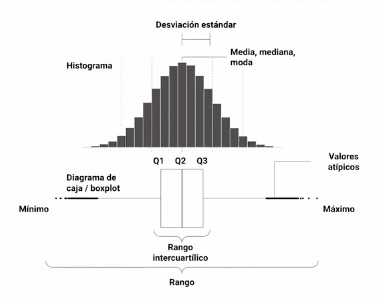

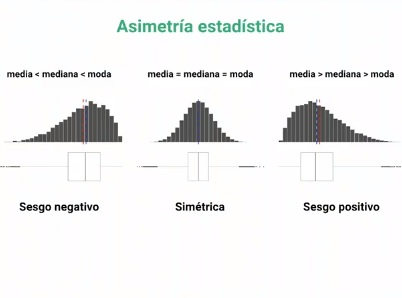

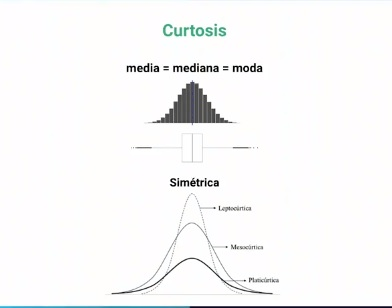

### Rango
*  La diferencia entre el valor máximo y valor mínimo

In [ ]:
#Valor maximo:
cdf['FLUJO MES VENTA'].max(numeric_only=True)

In [ ]:
#Valor minimo:
cdf.min(numeric_only=True)

In [ ]:
#Rango de variales
cdf.max(numeric_only=True) - cdf.min(numeric_only=True)

### Desviación Estandar
*  La dispersión media de una variable

In [ ]:
cdf.std(numeric_only=True)

### Rango intercuartílico
*  Comprenden +-25% de los datos respecto a la mediana

In [ ]:
cdf.quantile(0.25,numeric_only=True)

In [ ]:
cdf.quantile(0.50,numeric_only=True)

In [ ]:
cdf.quantile(0.75,numeric_only=True)

In [ ]:
#BOXPLOT

sns.boxplot(
    data=cdf,
    x='FLUJO MES VENTA'
)

plt.axvline(
    x=cdf['FLUJO MES VENTA'].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.show()

### Visualizando la distribución de una variable

In [ ]:
sns.histplot(
    data=cdf,
    x='FLUJO MES VENTA',
)

plt.axvline(
    x=cdf['FLUJO MES VENTA'].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.show()

In [ ]:
#BOXPLOT

sns.boxplot(
    data=cdf,
    x='FLUJO MES VENTA'
)